# Rotaciones de Euler.

In this notebook you'll explore Euler rotations and get a feel for why the order of rotations matters.

Euler rotations as we define them in this program are counterclockwise about the axes of the vehicle body frame, where:

 - Roll - ϕϕ is about the x-axis
 - Pitch - θθ is about the y-axis
 - Yaw - ψψ is about the z-axis

As you'll see the same set of rotation transformations, applied in a different order can produce a very different final result!

In [1]:
# Importamos las librerias
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from enum import Enum

In [2]:
#%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 12]
np.set_printoptions(precision=3, suppress=True)

In [3]:
class Rotation(Enum):
   ROLL = 0
   PITCH = 1
   YAW = 2

In [4]:
class EulerRotation:
   def __init__(self, rotations):
      '''
      rotations` is a list of 2-element tuples where the
      first element is the rotation kind and the second element
      is angle in degrees.
        
      Ex:
        [(Rotation.ROLL, 45), (Rotation.YAW, 32), (Rotation.PITCH, 55)]
      '''

      self._rotations = rotations
      self._rotation_map = {Rotation.ROLL : self.roll, Rotation.PITCH : self.pitch, Rotation.YAW : self.yaw}
  
   def roll(self, phi):
      '''Returns a rotation matrix along the roll axis'''
      cp, sp = np.cos(phi), np.sin(phi)
      R = np.matrix([[1, 0, 0], [0, cp, -sp], [0, sp, cp]])
      return R 

   def pitch(self, theta):
      """Returns the rotation matrix along the pitch axis"""
      ct, st = np.cos(theta), np.sin(theta)
      R = np.matrix([[ct, 0, st], [0, 1, 0], [-st, 0, ct]])
      return R

   def yaw(self, psi):
      """Returns the rotation matrix along the yaw axis"""
      cp, sp = np.cos(psi), np.sin(psi)
      R = np.matrix([[cp, -sp, 0], [sp, cp, 0], [0, 0, 1]])
      return R

   def rotate(self):
      """Applies the rotations in sequential order
         Using first the rot over z, then y, then x
         remember that you are rotating an object
      """
      R = np.eye(3)
      for rot_func, angle in self._rotations:
         #print( self._rotation_map[rot_func](np.radians(angle)))
         R = np.dot(R, self._rotation_map[rot_func](np.radians(angle)))
      return R

Below you'll form a sequence of rotations. The rotation matrix R is the mapping of performing the rotations in sequential order. Multiplying a vector by R will perform the rotations on that vector.

In [5]:
# Test your code by passing in some rotation values
rotations = [
    (Rotation.ROLL, 25),
    (Rotation.PITCH, 75),
    (Rotation.YAW, 90),
]

#for rot, angle in rotations:
#   print(rot)
#   print(angle)

#print(rotations)

R = EulerRotation(rotations).rotate()
print('Rotation matrix ...')
print(R)


Rotation matrix ...
[[ 0.    -0.259  0.966]
 [ 0.906 -0.408 -0.109]
 [ 0.423  0.875  0.235]]


 TODO: Modify the previous code in order to obtain the correct rotation matrix
 Should print
 Rotation matrix ...
 
 [[ 0.    -0.259  0.966]  
 [ 0.906 -0.408 -0.109]  
 [ 0.423  0.875  0.235]]

Go back and change the order of the rotations, you should get back a rotation matrix with different values.
Same Rotations, Different Order



In [6]:
#Now calculate three different rotations matrices. They should stem from the same set of Euler rotations, just in differing order.

rotations2 = [
    (Rotation.ROLL, 75),
    (Rotation.PITCH, 25),
    (Rotation.YAW, 90),
]

rotations3 = [
    (Rotation.ROLL, 90),
    (Rotation.PITCH, 75),
    (Rotation.YAW, 25),
]


In [7]:
# TODO: calculate 3 rotation matrices.
R1 = R
R2 = EulerRotation(rotations2).rotate()
R3 = EulerRotation(rotations3).rotate()

# Seeing is Believing
# It's clear the three rotation matrices are different, but, in order to get an deeper understanding let's plot the impact of the rotations.

# unit vector along x-axis
v = np.array([1, 0, 0])

#Apply the rotations to v. Feel free to change the values of this input vector.

# TODO: calculate the new rotated versions of `v`.
# rv = np.dot(R, v)
rv1 = np.dot(R1, v)
rv2 = np.dot(R2, v)
rv3 = np.dot(R3, v)


Rotated vectors ...
[[0.    0.906 0.423]]
[[0.    0.259 0.966]]
[[0.235 0.875 0.423]]
[[0.    0.906 0.423]]
[[0.    0.259 0.966]]
[[0.235 0.875 0.423]]


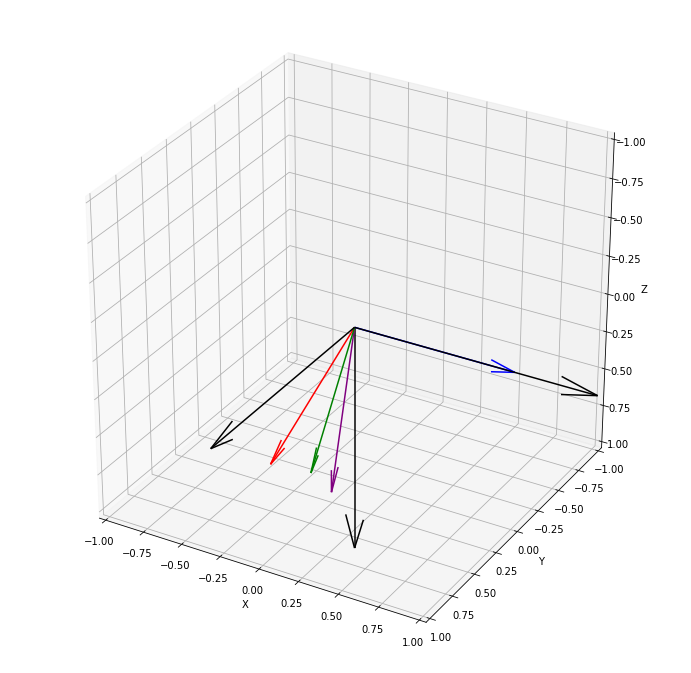

In [8]:
#Plotting time ...
print('Rotated vectors ...')
print(rv1)
print(rv2)
print(rv3)

fig = plt.figure()
ax = fig.gca(projection='3d')

# axes (shown in black)
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)

# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15)

# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1.item((0, 0)), rv1.item((0, 1)), rv1.item((0, 2)), color='red', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv2.item((0, 0)), rv2.item((0, 1)), rv2.item((0, 2)), color='purple', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv3.item((0, 0)), rv3.item((0, 1)), rv3.item((0, 2)), color='green', arrow_length_ratio=0.15)
print(rv1)
print(rv2)
print(rv3)

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

#Gimbal Lock
# TODO To demonstrate gimbal lock try starting a series of rotations with a pitch of +/- 90 degrees, then see what happens when you try to yaw. Try the yaw first and see what happens!
